In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
#plt.style.use('fivethirtyeight')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime

In [5]:
df = pd.read_excel("/content/drive/MyDrive/RSDS/patan_final.xlsx")

In [6]:
df.head()

,Date,Arrival,Price
0,2010-01-01,84.8,2755.0
1,2010-01-02,75.8,2750.0
2,2010-01-03,80.3,2752.5
3,2010-01-04,87.4,2750.0
4,2010-01-05,122.1,2770.0


In [7]:
df.describe()

,Date,Arrival,Price
count,5438,5438.000000,5438.000000
mean,2017-06-11 12:00:00,328.830241,4505.713616
min,2010-01-01 00:00:00,0.230000,2450.000000
25%,2013-09-21 06:00:00,135.543976,3650.000000
50%,2017-06-11 12:00:00,240.200000,4150.000000
75%,2021-03-01 18:00:00,429.172500,5382.666667
max,2024-11-20 00:00:00,2241.800000,7615.000000
std,NaN,296.937523,1161.928912


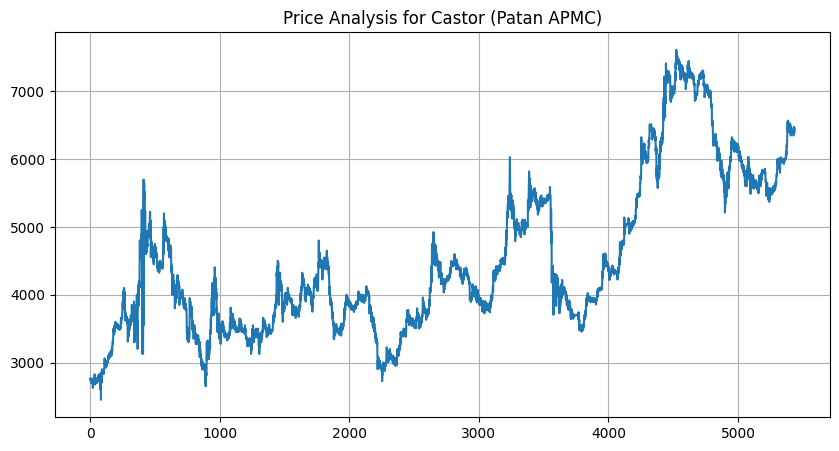

In [8]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(df['Price'])
plt.title('Price Analysis for Castor (Patan APMC)')
plt.grid(True)
plt.show()

In [9]:
#H0
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Price'])

In [10]:
test_result

(-1.7279350826860123,
 0.41677998192014937,
 28,
 5409,
 {'1%': -3.431559540776716,
  '5%': -2.862074495126272,
  '10%': -2.5670545108744043},
 63159.62039410306)

In [11]:
#H1
from statsmodels.tsa.stattools import adfuller
test_result1=adfuller(df['Price'].diff().dropna())
test_result1

(-11.781348606851434,
 1.0330943009576943e-21,
 33,
 5403,
 {'1%': -3.431560884603653,
  '5%': -2.8620750888414417,
  '10%': -2.5670548269288087},
 63148.50808057397)

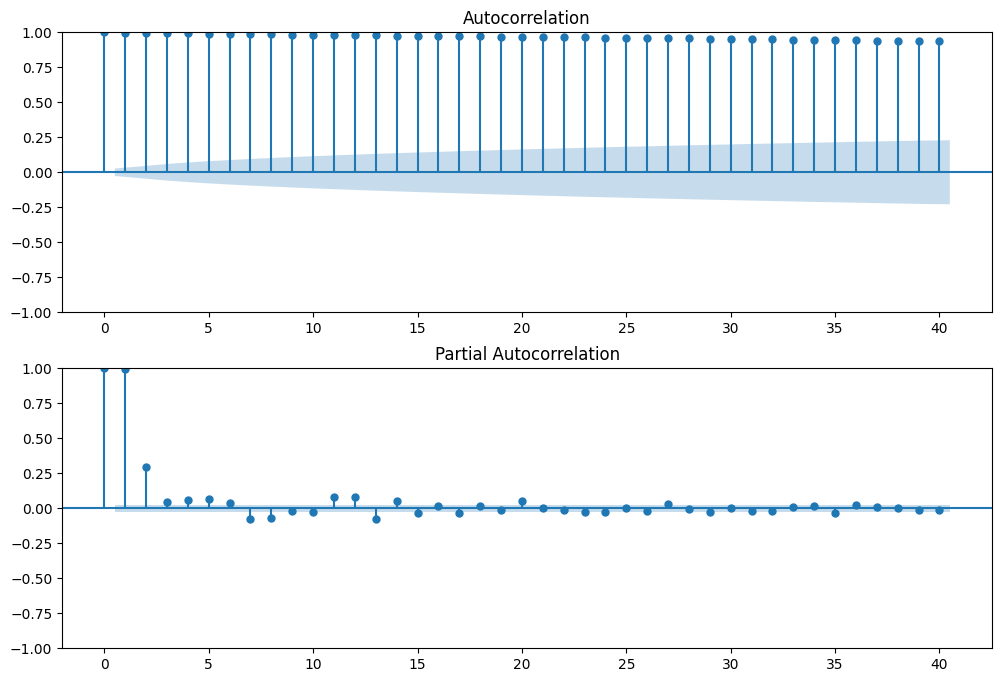

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'], lags=40, ax=ax2)
plt.show()

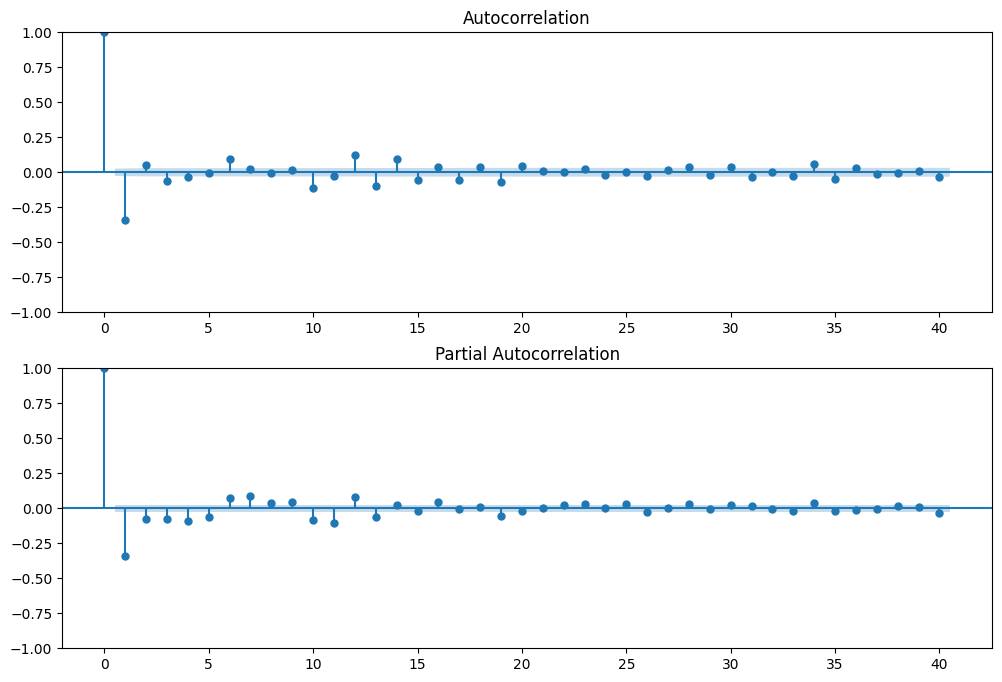

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(df['Price'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [14]:
X = df['Price']
X = X.values
# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(X) * 0.8)
train_data_new = X[:train_size]
test_data_new = X[train_size:]

In [15]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00


In [16]:
from pmdarima.arima import auto_arima

In [17]:
Sarima_model =  auto_arima(train_data_new,start_p=0, d=1, start_q=0,
                          max_p=3, max_d=3, max_q=3, start_P=0,
                          D=0, start_Q=0, max_P=3, max_D=3,
                          max_Q=3, m=7, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=52109.364, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=51540.518, Time=1.87 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=51487.723, Time=7.10 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=52107.694, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=51503.434, Time=4.61 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=51464.072, Time=18.27 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=51485.030, Time=8.47 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=51461.254, Time=23.29 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=51462.643, Time=5.44 sec
 ARIMA(0,1,1)(3,0,1)[7] intercept   : AIC=51463.238, Time=25.85 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=51457.530, Time=22.88 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=51461.307, Time=15.37 sec
 ARIMA(0,1,1)(3,0,2)[7] intercept   : AIC=51459.534, Time=32.35 sec
 ARIMA(0,1,1)(2,0,3)[7] intercept   : AIC=51459.538, Time=33.58 sec
 ARIMA(0,1,1

In [18]:
#Summary of the model
Sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 4350
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 7)   Log Likelihood              -25722.117
Date:                                Thu, 28 Nov 2024   AIC                          51456.233
Time:                                        16:16:00   BIC                          51494.500
Sample:                                             0   HQIC                         51469.740
                                               - 4350                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3916      0.003   -138.407      0.000      -0.397      -0.386
ar.S.L7       -0.1867      0.082     -2.270      0.023      -0.348      -0.025
ar.S.L14       0.4651      0.075      6.240      0.000       0.319       0.611
ma.S.L7        0.2493      0.083      2.994      0.003       0.086       0.413
ma.S.L14      -0.3713      0.075     -4.959      0.000      -0.518      -0.225
sigma2      8030.8321     32.137    249.896      0.000    7967.845    8093.819
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           1573580.41
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -2.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        96.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

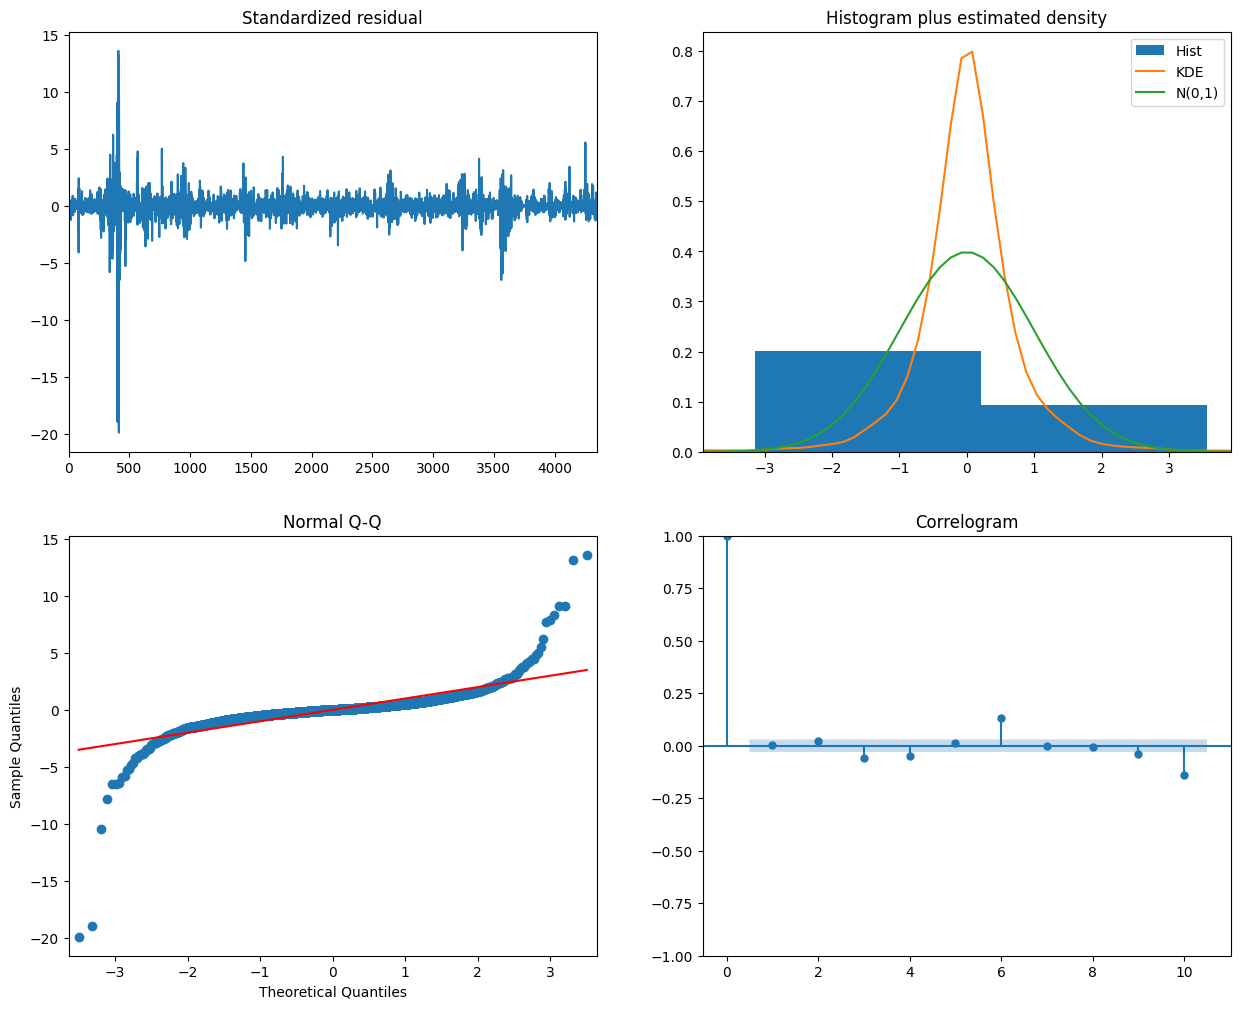

In [19]:
Sarima_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [20]:
train_data_new = pd.DataFrame({'Date': df['Date'][:train_size], 'Price': train_data_new})
test_data_new = pd.DataFrame({'Date': df['Date'][train_size:], 'Price': test_data_new})

In [21]:
train_data_new

,Date,Price
0,2010-01-01,2755.000000
1,2010-01-02,2750.000000
2,2010-01-03,2752.500000
3,2010-01-04,2750.000000
4,2010-01-05,2770.000000
...,...,...
4345,2021-11-24,6440.000000
4346,2021-11-25,6410.000000
4347,2021-11-26,6385.000000
4348,2021-11-27,6450.000000


In [22]:
test_data_new

,Date,Price
4350,2021-11-29,6410.0
4351,2021-11-30,6390.0
4352,2021-12-01,6450.0
4353,2021-12-02,6445.0
4354,2021-12-03,6395.0
...,...,...
5433,2024-11-16,6475.0
5434,2024-11-17,6441.0
5435,2024-11-18,6450.0
5436,2024-11-19,6450.0


In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
from datetime import timedelta

In [25]:
# Make predictions on the training data
train_predictions_new, _ = Sarima_model.predict_in_sample(return_conf_int=True)

# Store the training predictions with dates
train_predictions_df_new = pd.DataFrame({'Date': train_data_new['Date'], 'Predicted_Price': train_predictions_new})
train_predictions_df_new.set_index('Date', inplace=True)

# Make predictions on the test data
test_predictions_new, conf_int =Sarima_model.predict(n_periods=len(test_data_new), return_conf_int=True)

# Store the test predictions with dates
test_predictions_df_new = pd.DataFrame({'Date': test_data_new['Date'], 'Predicted_Price': test_predictions_new})
test_predictions_df_new.set_index('Date', inplace=True)

# Forecast 10 steps ahead
forecast_steps = 100
forecast_new, conf_int_forecast =Sarima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Create a DataFrame for the forecasted values with future dates
future_dates = pd.date_range(df['Date'].max() + timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df_new = pd.DataFrame({'Date': future_dates, 'Forecasted_Price': forecast_new})
forecast_df_new.set_index('Date', inplace=True)

In [26]:
test_predictions_df_new

,Predicted_Price
Date,
2021-11-29,6416.389939
2021-11-30,6422.969010
2021-12-01,6413.630633
2021-12-02,6413.583017
2021-12-03,6417.289620
...,...
2024-11-16,6424.203756
2024-11-17,6424.203756
2024-11-18,6424.203756


In [27]:
forecast_df_new

,Forecasted_Price
Date,
2024-11-21,6416.389939
2024-11-22,6422.969010
2024-11-23,6413.630633
2024-11-24,6413.583017
2024-11-25,6417.289620
...,...
2025-02-24,6424.237082
2025-02-25,6424.301810
2025-02-26,6424.286674


In [28]:
forecast_df_new.shape

(100, 1)

In [29]:
train_data_new['Date'] = pd.to_datetime(train_data_new['Date'])
test_data_new['Date'] = pd.to_datetime(test_data_new['Date'])
train_predictions_df_new.index = pd.to_datetime(train_predictions_df_new.index)
test_predictions_df_new.index = pd.to_datetime(test_predictions_df_new.index)
forecast_df_new.index = pd.to_datetime(forecast_df_new.index)

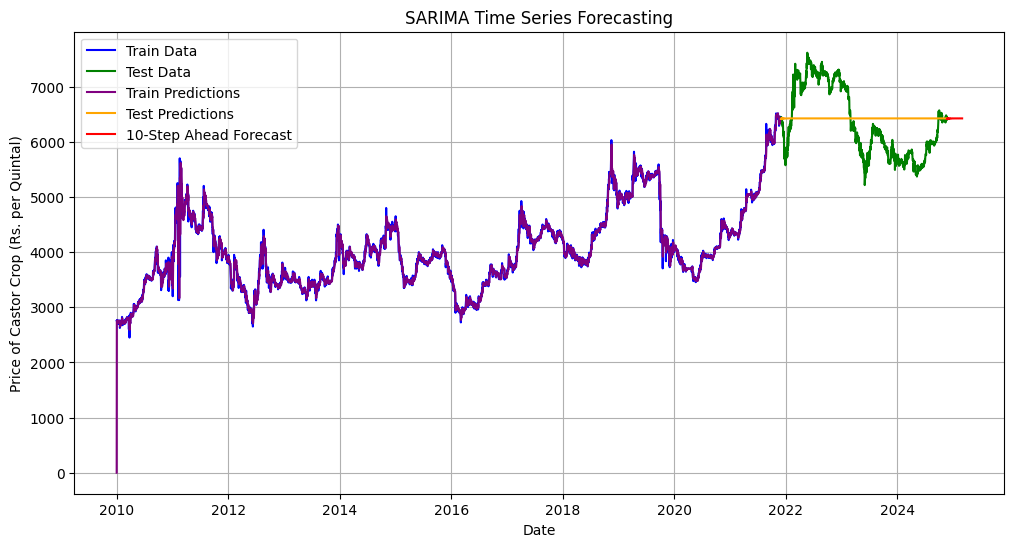

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_new['Date'], train_data_new['Price'], label='Train Data', color='blue')
plt.plot(test_data_new['Date'], test_data_new['Price'], label='Test Data', color='green')
plt.plot(train_predictions_df_new.index, train_predictions_df_new['Predicted_Price'], label='Train Predictions', color='purple')
plt.plot(test_predictions_df_new.index, test_predictions_df_new['Predicted_Price'], label='Test Predictions', color='orange')
plt.plot(forecast_df_new.index, forecast_df_new['Forecasted_Price'], label='10-Step Ahead Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price of Castor Crop (Rs. per Quintal)')
plt.legend()
plt.title('SARIMA Time Series Forecasting')
plt.grid(True)
plt.show()

In [31]:
test_predictions_df_new

,Predicted_Price
Date,
2021-11-29,6416.389939
2021-11-30,6422.969010
2021-12-01,6413.630633
2021-12-02,6413.583017
2021-12-03,6417.289620
...,...
2024-11-16,6424.203756
2024-11-17,6424.203756
2024-11-18,6424.203756


In [32]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_auto_arima=math.sqrt(mean_squared_error(test_predictions_df_new['Predicted_Price'],test_data_new['Price']))
print('Mean value of price is : {}. Root Mean Squared Error is :{}'.format(mean(test_data_new['Price']),rmse_auto_arima))

Mean value of price is : 6343.692662377451. Root Mean Squared Error is :648.7113932475789


In [33]:
from sklearn.metrics import mean_squared_error
y_true = test_data_new["Price"]
y_pred = test_predictions_df_new

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculate the range of the target variable
y_range = np.max(y_true) - np.min(y_true)

# Calculate the RMSE as a percentage of the range
rmse_percentage = (rmse / y_range) * 100

print(f'Root Mean Squared Error (MSE) : {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')

Root Mean Squared Error (MSE) : 420826.47
Root Mean Squared Error (RMSE) : 648.71
Root Mean Squared Error (RMSE) as a percentage of the range: 27.03%


In [34]:
# Convert the 'Date' column to datetime format
test_data_new['Date'] = pd.to_datetime(test_data_new['Date'])

# Set 'Date' as the index for time series analysis
test_data_new.set_index('Date',inplace=True)

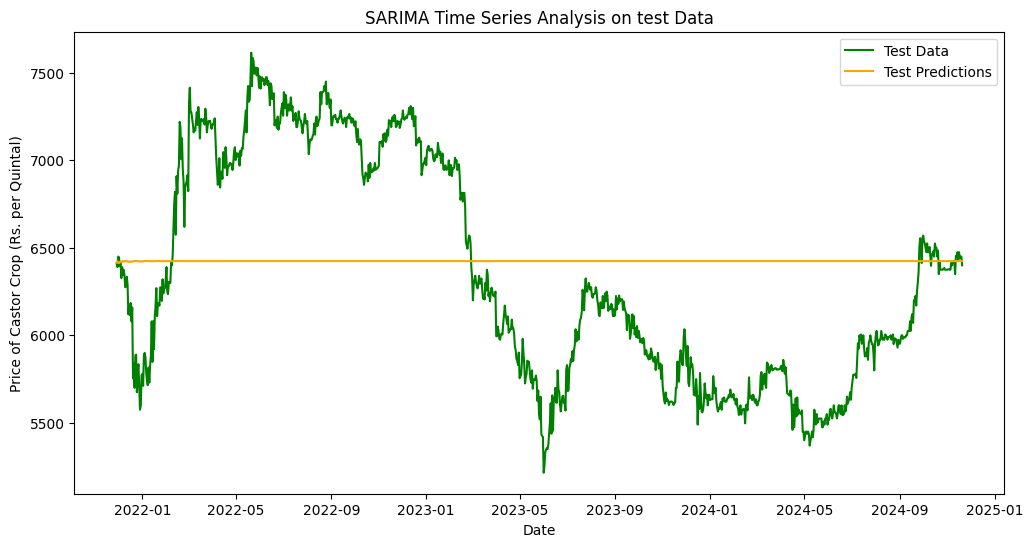

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(test_data_new.index, test_data_new['Price'], label='Test Data', color='green')
plt.plot(test_predictions_df_new.index, test_predictions_df_new, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Price of Castor Crop (Rs. per Quintal)')
plt.legend()
plt.title('SARIMA Time Series Analysis on test Data')
plt.show()